<a href="https://colab.research.google.com/github/rkrishnan944/FaceRecognition/blob/master/Dog-Cat-trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from zipfile import ZipFile
file_name = "PetImages.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("done")

done


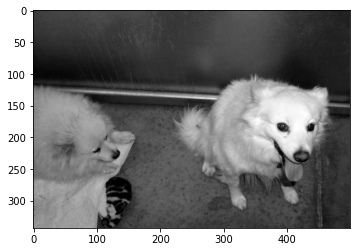

In [5]:
import tensorflow 
import numpy as np 
import matplotlib.pyplot as plt 
import os.path
import cv2
import pandas
from pathlib import Path

DATADIR = "/content/PetImages"
CATEGORIES = ["Dog","Cat"]

for category in CATEGORIES:
  path = os.path.join(DATADIR,category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array,cmap="gray")
    plt.show()
    break
  break 
#print(img_array.shape)

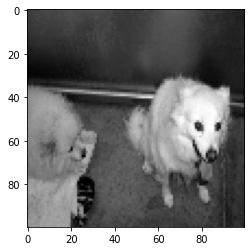

In [6]:
IMG_SIZE = 100
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap="gray")
plt.show()

In [7]:
training_data = []

def create_trainig_data():
  for category in CATEGORIES:

      path = os.path.join(DATADIR,category)
      class_num = CATEGORIES.index(category)
      for img in os.listdir(path):
        try:
          img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
          new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
          training_data.append([new_array,class_num])
        except Exception as e :
          pass

create_trainig_data()
#print(len(training_data))


In [8]:
import random 
random.shuffle(training_data)

#for sample in training_data[:10]:
  #print(sample[1])

In [9]:
X = [] #features
y = [] #labels



In [10]:
for features , label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1,IMG_SIZE , IMG_SIZE,1) #cant pass list to neural net. so converted to np array , -1 is random argu''''''ment , reshape to img_size , not necessary as done already ,1 because grayscale




In [11]:
import pickle
pickle_out = open("X.pickle","wb")
pickle.dump(X,pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()


In [12]:
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense , Dropout , Activation , Flatten , Conv2D , MaxPooling2D
import pickle 

X = pickle.load(open("X.pickle","rb"))
y = pickle.load(open("y.pickle","rb"))

X=np.array(X/255.0)
y=np.array(y)

model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = "binary_crossentropy",
              optimizer = "adam",
              metrics=['accuracy'])

model.fit(X, y, batch_size = 25 , epochs = 5 , validation_split =0.1)









Epoch 1/5
42/42 [==============================] - 1s 18ms/step - loss: 0.7333 - accuracy: 0.6124 - val_loss: 0.6310 - val_accuracy: 0.6923
Epoch 2/5
42/42 [==============================] - 0s 12ms/step - loss: 0.6596 - accuracy: 0.6450 - val_loss: 0.6244 - val_accuracy: 0.6923
Epoch 3/5
42/42 [==============================] - 0s 12ms/step - loss: 0.6341 - accuracy: 0.6421 - val_loss: 0.6218 - val_accuracy: 0.6923
Epoch 4/5
42/42 [==============================] - 0s 11ms/step - loss: 0.6094 - accuracy: 0.6756 - val_loss: 0.6342 - val_accuracy: 0.6667
Epoch 5/5
42/42 [==============================] - 0s 12ms/step - loss: 0.5465 - accuracy: 0.7311 - val_loss: 0.5939 - val_accuracy: 0.6923
